In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df=pd.read_csv("ml_salaries.csv")

# Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   years_of_experience  100 non-null    int64
 1   salary               100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [4]:
df.describe()

,years_of_experience,salary
count,100.000000,100.000000
mean,5.210000,3232.640000
std,2.614238,542.383787
min,1.000000,2237.000000
25%,3.000000,2777.500000
50%,5.500000,3256.500000
75%,7.000000,3610.250000
max,10.000000,4708.000000


In [5]:
df.columns

Index(['years_of_experience', 'salary'], dtype='object')

In [6]:
df.shape

(100, 2)

# Graphical representation

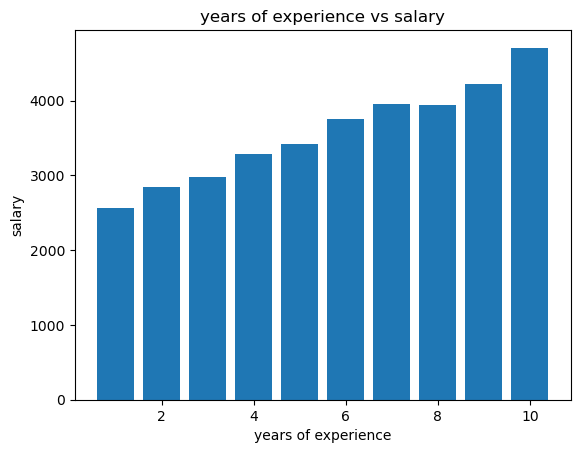

In [7]:
plot.bar(df["years_of_experience"],df["salary"],label="Bar Graph")
plot.xlabel("years of experience")
plot.ylabel("salary")
plot.title("years of experience vs salary")
plot.show()

In [8]:
df.value_counts().sort_index()

years_of_experience  salary
1                    2237      1
                     2328      1
                     2389      1
                     2479      1
                     2559      1
                              ..
9                    4227      1
10                   4033      1
                     4551      1
                     4553      1
                     4708      1
Name: count, Length: 98, dtype: int64

# Data cleaning

In [9]:
df.isnull().sum()

years_of_experience    0
salary                 0
dtype: int64

In [10]:
df["salary"]=df["salary"].fillna(2000)
df["years_of_experience"]=df["years_of_experience"].fillna(1)

In [11]:
df.head()

,years_of_experience,salary
0,5,3150
1,9,3787
2,4,2991
3,10,4551
4,8,3540


# Making model

In [12]:
df.columns

Index(['years_of_experience', 'salary'], dtype='object')

In [13]:
x=df['years_of_experience'].values
y=df['salary'].values

In [14]:
# convert x into 2d array because sklearn evalute 2d array only
x=x.reshape(-1,1)

In [15]:
model=LinearRegression()
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [16]:
model.fit(xtrain,ytrain)

LinearRegression()

In [17]:
predictions=model.predict(xtest)
predictions

array([3961.40496272, 2586.6369637 , 3372.21867742, 3568.61410586,
       3175.82324899, 3961.40496272, 3372.21867742, 3961.40496272,
       3175.82324899, 3372.21867742, 2586.6369637 , 2586.6369637 ,
       2979.42782056, 2390.24153526, 3568.61410586, 3175.82324899,
       2979.42782056, 3568.61410586, 2586.6369637 , 4157.80039115,
       3765.00953429, 3175.82324899, 2783.03239213, 2586.6369637 ,
       3372.21867742, 2586.6369637 , 3568.61410586, 3765.00953429,
       3372.21867742, 4157.80039115])

In [21]:
print("Mean Squared Error: ",mean_squared_error(ytest,predictions))
print("R square: ",r2_score(ytest,predictions))

Mean Squared Error:  42289.30846152225
R square:  0.8504287056856994


In [25]:
print("CoEfficients: ",model.coef_)
print("Intercept: ",model.intercept_)

CoEfficients:  [196.39542843]
Intercept:  2193.846106832905


# Graph for Linear Regression

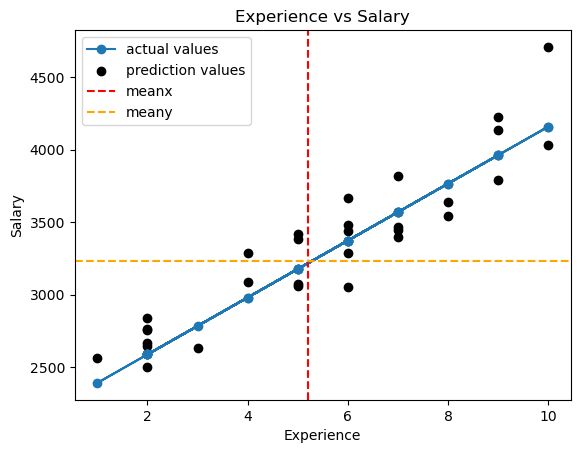

In [60]:
meanx=np.mean(x)
meany=np.mean(y)
plot.plot(xtest,predictions,label="actual values",marker="o")
plot.scatter(xtest,ytest,color="black",label="prediction values")
plot.xlabel("Experience")
plot.ylabel("Salary")
plot.title("Experience vs Salary")
plot.axvline(meanx,linestyle="--",color="red",label="meanx")
plot.axhline(meany,linestyle="--",color="orange",label="meany")
plot.legend()
plot.show()

In [74]:
own=model.predict([[50]])
print(own[0])

12013.61752841951
